#this file is going to simulate the game 123. we suppose to have a deck of 40 cards (neapolitan cards)
#the game itself is very simple, we are going to go through the shuffled deck:
#we win if in the positions moduled by 1,2 or 3 we get a 1,2 or 3

In [88]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np

In [89]:
#creating the deck
deck = []
for i in range (1,11):
    for j in range (1, 5):
        deck.append(i)

print(deck)
len(deck)
#the deck has been created

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]


40

In [ ]:
#a simple, optimized and unbiased function to shuffle the deck
def shuffle_deck(deck:list):
    random.shuffle(deck)
    return deck

In [ ]:
#one game simulation
def game(deck):
    game_won = True
    match_num = 1
    deck = shuffle_deck(deck)
    for i in range (len(deck)):
        if deck[i] == match_num:
            game_won = False
            break
        match_num = (match_num + 1)%4
        if match_num == 0: match_num = 1
    return game_won

In [ ]:
#simulating games over 10000 iterations
data = {}
for i in range (10000):
    times_lost = 0
    while game(deck) == False:
        times_lost +=1
    data[i] = times_lost
    

average number of attempts = 118.0278
maximum number of attempts = 1104
minimum number of attempts = 0
standard deviation of attempts = 118.19620394564286


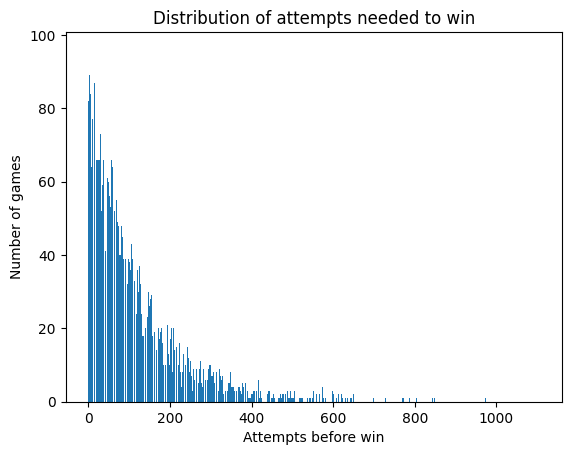

In [97]:
# Count how many times each number of attempts occurred
attempt_counts = Counter(data.values())
vet = np.array(list(data.values()))
print(f'average number of attempts = {vet.mean()}')
print(f'maximum number of attempts = {vet.max()}')
print(f'minimum number of attempts = {vet.min()}')
print(f'standard deviation of attempts = {vet.std()}')
# Sort by number of attempts
attempts = sorted(attempt_counts.keys())
frequencies = [attempt_counts[a] for a in attempts]

plt.bar(attempts, frequencies)
plt.xlabel('Attempts before win')
plt.ylabel('Number of games')
plt.title('Distribution of attempts needed to win')
plt.show()